## CRIMINAL PREDICTION ##

**BY- Swastik Mahapatra**
**email- swastik.mhptr@gmail.com**

## Model To Classify Whether The Given Person is a Criminal of Not##

**Libraries used:-**
- numpy is the fundamental package for scientific computing with Python.
- h5py is a common package to interact with a dataset that is stored on an H5 file.
- matplotlib is a famous library to plot graphs in Python.



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

%matplotlib inline

**Loading the Tran set data into the notebook**

In [7]:
import pandas as pd
import io
d1 = pd.read_csv("data/criminal_train.csv")
print(d1)

       IFATHER  NRCH17_2  IRHHSIZ2  IIHHSIZ2  IRKI17_2  IIKI17_2  IRHH65_2  \
0            4         1         2         1         2         1         1   
1            4         0         1         1         1         1         1   
2            4         2         3         1         3         1         1   
3            4         0         4         1         1         1         1   
4            1         0         4         1         3         1         1   
5            4         0         2         1         1         1         1   
6            1         0         4         1         2         1         1   
7            1         0         5         1         3         1         1   
8            4         0         4         1         1         1         1   
9            4         0         1         1         1         1         1   
10           4         1         3         1         2         1         1   
11           2         0         3         1         3         1

**Splitting the data into required Train and Validation datasets**

In [0]:
t = np.zeros((45718,71))
t[:] = d1[:]

split = 5000
df = t[:split,:]
dt = t[split:,:]

In [9]:
train = np.zeros((40718,71))
train[:] = dt[:]
print(train)

[[2.0000e+00 0.0000e+00 3.0000e+00 ... 4.0038e+04 2.0000e+00 0.0000e+00]
 [4.0000e+00 2.0000e+00 4.0000e+00 ... 4.0015e+04 1.0000e+00 0.0000e+00]
 [4.0000e+00 0.0000e+00 2.0000e+00 ... 4.0030e+04 2.0000e+00 0.0000e+00]
 ...
 [1.0000e+00 0.0000e+00 3.0000e+00 ... 4.0023e+04 2.0000e+00 0.0000e+00]
 [4.0000e+00 0.0000e+00 4.0000e+00 ... 4.0015e+04 2.0000e+00 0.0000e+00]
 [4.0000e+00 1.0000e+00 3.0000e+00 ... 4.0034e+04 2.0000e+00 0.0000e+00]]


In [10]:
test = np.zeros((5000,71))
test[:] = df[:]
print(test)

[[4.0000e+00 1.0000e+00 2.0000e+00 ... 4.0035e+04 2.0000e+00 0.0000e+00]
 [4.0000e+00 0.0000e+00 1.0000e+00 ... 4.0003e+04 1.0000e+00 0.0000e+00]
 [4.0000e+00 2.0000e+00 3.0000e+00 ... 4.0038e+04 1.0000e+00 0.0000e+00]
 ...
 [4.0000e+00 0.0000e+00 2.0000e+00 ... 4.0022e+04 2.0000e+00 0.0000e+00]
 [4.0000e+00 0.0000e+00 2.0000e+00 ... 4.0017e+04 1.0000e+00 0.0000e+00]
 [2.0000e+00 0.0000e+00 3.0000e+00 ... 4.0010e+04 1.0000e+00 0.0000e+00]]


In [11]:
print("test"+ str(df.shape))

test(5000, 71)


**Separating the "Criminal" column into a separate dataset as Output**

In [12]:
Y_test = np.zeros((5000,1))

Y_test[:] = test[:,[70]]
print(Y_test)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [13]:
Y_train = np.zeros((40718,1))

Y_train[:] = train[:,[70]]
print(Y_train)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [0]:
X_test = np.zeros((5000,70))
X_train = np.zeros((40718,70))

X_test = np.delete(test,70,axis=1)
X_train = np.delete(train,70,axis=1)


In [15]:
print(X_test)
print("test:"+ str(X_test.shape))
print(X_train)
print("Train:"+ str(X_train.shape))

[[4.00000000e+00 1.00000000e+00 2.00000000e+00 ... 2.50987666e+03
  4.00350000e+04 2.00000000e+00]
 [4.00000000e+00 0.00000000e+00 1.00000000e+00 ... 3.85796934e+03
  4.00030000e+04 1.00000000e+00]
 [4.00000000e+00 2.00000000e+00 3.00000000e+00 ... 2.04709758e+03
  4.00380000e+04 1.00000000e+00]
 ...
 [4.00000000e+00 0.00000000e+00 2.00000000e+00 ... 1.12758566e+04
  4.00220000e+04 2.00000000e+00]
 [4.00000000e+00 0.00000000e+00 2.00000000e+00 ... 1.78414132e+03
  4.00170000e+04 1.00000000e+00]
 [2.00000000e+00 0.00000000e+00 3.00000000e+00 ... 1.34965244e+03
  4.00100000e+04 1.00000000e+00]]
test:(5000, 70)
[[2.00000000e+00 0.00000000e+00 3.00000000e+00 ... 2.32875785e+02
  4.00380000e+04 2.00000000e+00]
 [4.00000000e+00 2.00000000e+00 4.00000000e+00 ... 7.35768196e+03
  4.00150000e+04 1.00000000e+00]
 [4.00000000e+00 0.00000000e+00 2.00000000e+00 ... 5.32077248e+03
  4.00300000e+04 2.00000000e+00]
 ...
 [1.00000000e+00 0.00000000e+00 3.00000000e+00 ... 5.12671234e+02
  4.00230000e+04

**Setting the final datasets**

In [0]:

X_train_final = np.zeros((70,40718))
X_test_final = np.zeros((70,5000))
Y_train_final = np.zeros((1,40718))
Y_test_final = np.zeros((1,5000))

X_train_final = np.transpose(X_train)
X_test_final = np.transpose(X_test)
Y_train_final = np.transpose(Y_train)
Y_test_final = np.transpose(Y_test)

In [17]:
print(X_train_final[:][:])

[[2.00000000e+00 4.00000000e+00 4.00000000e+00 ... 1.00000000e+00
  4.00000000e+00 4.00000000e+00]
 [0.00000000e+00 2.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.00000000e+00 4.00000000e+00 2.00000000e+00 ... 3.00000000e+00
  4.00000000e+00 3.00000000e+00]
 ...
 [2.32875785e+02 7.35768196e+03 5.32077248e+03 ... 5.12671234e+02
  4.62459704e+02 1.52381087e+03]
 [4.00380000e+04 4.00150000e+04 4.00300000e+04 ... 4.00230000e+04
  4.00150000e+04 4.00340000e+04]
 [2.00000000e+00 1.00000000e+00 2.00000000e+00 ... 2.00000000e+00
  2.00000000e+00 2.00000000e+00]]


**NORMALISING the training and Validation data**

In [18]:
mtr = X_train_final.shape[1]
print(mtr)
utr = np.sum(X_train_final,axis=1,keepdims=True)/mtr
print(utr)

40718
[[3.35338180e+00]
 [4.73353308e-01]
 [3.42521735e+00]
 [1.00162090e+00]
 [2.08310821e+00]
 [1.00702392e+00]
 [1.16329387e+00]
 [1.01085515e+00]
 [9.73414706e+01]
 [7.07639373e+01]
 [2.35362739e+00]
 [2.61442114e+00]
 [2.20086939e+00]
 [2.02485387e+00]
 [3.95336215e+01]
 [8.61279041e+01]
 [1.28036741e+01]
 [9.23097893e+01]
 [8.93534555e+01]
 [9.13251633e+01]
 [9.71275112e+01]
 [9.71609116e+01]
 [9.71723316e+01]
 [9.71551402e+01]
 [9.71607888e+01]
 [1.77174714e+00]
 [1.01827202e+00]
 [1.91649885e+00]
 [1.00933248e+00]
 [1.96124564e+00]
 [1.00505919e+00]
 [1.38744536e+00]
 [1.01360578e+00]
 [8.58300260e+01]
 [7.88702785e+00]
 [9.79784616e+01]
 [9.79784616e+01]
 [1.94623999e+00]
 [1.10351687e+00]
 [1.01792819e+00]
 [1.85473255e+00]
 [1.73004568e+00]
 [1.13878383e+00]
 [1.83781129e+00]
 [1.01900879e+00]
 [1.93113611e+00]
 [1.01891056e+00]
 [1.80045680e+00]
 [1.00992190e+00]
 [1.97291124e+00]
 [1.01468638e+00]
 [1.96350508e+00]
 [1.01119898e+00]
 [9.40897146e+01]
 [8.52168574e+00]
 [2.

In [0]:
train_set_x = X_train_final - utr
test_set_x = X_test_final - utr

In [0]:
norm = (np.sum(np.square(train_set_x),axis=1,keepdims=True))/mtr

train_set_x = train_set_x / norm
test_set_x = test_set_x / norm

In [21]:
print(train_set_x)
print("train:"+ str(train_set_x.shape))
print(test_set_x)
print("Test:"+ str(test_set_x.shape))

[[-9.74341659e-01  4.65520561e-01  4.65520561e-01 ... -1.69427277e+00
   4.65520561e-01  4.65520561e-01]
 [-6.03470629e-01  1.94629767e+00 -6.03470629e-01 ... -6.03470629e-01
  -6.03470629e-01  6.71413519e-01]
 [-2.08341890e-01  2.81623749e-01 -6.98307529e-01 ... -2.08341890e-01
   2.81623749e-01 -2.08341890e-01]
 ...
 [-1.36803566e-04  8.21169711e-05  1.95298207e-05 ... -1.28206424e-04
  -1.29749250e-04 -9.71376163e-05]
 [ 1.83434521e-04 -1.08059843e-04  8.20451771e-05 ... -6.67049903e-06
  -1.08059843e-04  1.32739849e-04]
 [ 2.01866538e+00 -1.97705757e+00  2.01866538e+00 ...  2.01866538e+00
   2.01866538e+00  2.01866538e+00]]
train:(70, 40718)
[[ 4.65520561e-01  4.65520561e-01  4.65520561e-01 ...  4.65520561e-01
   4.65520561e-01 -9.74341659e-01]
 [ 6.71413519e-01 -6.03470629e-01  1.94629767e+00 ... -6.03470629e-01
  -6.03470629e-01 -6.03470629e-01]
 [-6.98307529e-01 -1.18827317e+00 -2.08341890e-01 ... -6.98307529e-01
  -6.98307529e-01 -2.08341890e-01]
 ...
 [-6.68392408e-05 -2.54170

# Activation Functions

**Defininhg Sigmoid activation function**

In [0]:
def sigmoid(z):
   
    s = 1 / (1 + np.exp(-z))
    
    return s

In [0]:
def sigmoiderivative(Z):
  
  f = Z * (1-Z)
  
  return f

**function for tanh activation**

In [0]:
def tanh(z):
    
    s = (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))
    
    return s

**derivative of tanh activation**

In [0]:
def tanhderivative(x):
    
    p = 1 - np.square(x)
    
    return p

**function for RELU activation**

In [0]:
def relu(z):
    
    s = np.maximum(0,z)
    
    return s

**derivative of RELU activation**

In [0]:
def reluderivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x


# Core functions

**Initialising the Weights and bais**

In [0]:
def initialize(layer):
    
    l = len(layer)
    parameters = {}
    np.random.seed(0)
    for i in range(1,l-1):
      parameters["W"+str(i)]=np.random.randn(layer[i],layer[i-1]) * np.sqrt(2/layer[i-1]) 
      parameters["b"+str(i)]=np.zeros((layer[i],1))
    
    parameters["W"+str(l-1)]=np.random.randn(layer[l-1],layer[l-2]) * 0.001
    parameters["b"+str(l-1)]=np.zeros((layer[l-1],1)) 
   
    
    return parameters

**Initialising parameters for ADAM Optimiser**

In [0]:
def initialize_adam(parameters,layer) :
    
    L = len(parameters) // 2
    v = {}
    s = {}
    
   
    for l in range(L-1):
   
        v["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
    
    
    return v, s

**Breaking the training dataset with random minibatches**

In [0]:
def random_mini_batches(X, Y, mini_batch_size = 512):
    
               
    m = X.shape[1]                  
    mini_batches = []
        
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size]
      
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        
        mini_batch_X = shuffled_X[:, num_complete_minibatches*mini_batch_size:]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches*mini_batch_size:]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

**FORWARD PROPAGATION**

In [0]:
def fwd_propagation(X,parameters,layer):
  
  l = len(layer)
  forward = {}
  
  forward["Z"+str(1)]=np.dot(parameters["W"+str(1)],X)+parameters["b"+str(1)]
    
  forward["A"+str(1)]=relu(forward["Z"+str(1)])
  
  for i in range(2,l-1):
    forward["Z"+str(i)]=np.dot(parameters["W"+str(i)],forward["A"+str(i-1)])+parameters["b"+str(i)]
    forward["A"+str(i)]=relu(forward["Z"+str(i)])
   
  forward["Z"+str(l-1)]=np.dot(parameters["W"+str(l-1)],forward["A"+str(l-2)])+parameters["b"+str(l-1)]
  forward["A"+str(l-1)]=sigmoid(forward["Z"+str(l-1)])
  
  return forward

**FORWARD-PROPAGATION with DROPOUTS**

In [0]:
def fwd_propagation_drop(X,parameters,layer,keep_prob):
  drop = {}
  l = len(layer)
  forward = {}
  
  forward["Z"+str(1)]=np.dot(parameters["W"+str(1)],X)+parameters["b"+str(1)]
    
  forward["A"+str(1)]=relu(forward["Z"+str(1)])
  drop["d"+str(1)]=(np.random.rand(forward["A"+str(1)].shape[0],forward["A"+str(1)].shape[1])) < keep_prob[1]
    
  forward["A"+str(1)] = np.multiply(forward["A"+str(1)],drop["d"+str(1)])
  forward["A"+str(1)] = forward["A"+str(1)] / keep_prob[1]
  
  for i in range(2,l-1):
    forward["Z"+str(i)]=np.dot(parameters["W"+str(i)],forward["A"+str(i-1)])+parameters["b"+str(i)]
    
    forward["A"+str(i)]=relu(forward["Z"+str(i)])
    drop["d"+str(i)]=(np.random.rand(forward["A"+str(i)].shape[0],forward["A"+str(i)].shape[1])) < keep_prob[i]
    
    forward["A"+str(i)] = np.multiply(forward["A"+str(i)],drop["d"+str(i)])
    forward["A"+str(i)] = forward["A"+str(i)] / keep_prob[i]
    
  forward["Z"+str(l-1)]=np.dot(parameters["W"+str(l-1)],forward["A"+str(l-2)])+parameters["b"+str(l-1)]
  forward["A"+str(l-1)]=sigmoid(forward["Z"+str(l-1)])
  
  return forward

**BACK_PROPATION WITH L2 Regularization**

In [0]:
def back_prop(X,Y,forward,layer,parameters,lambd=0.6):
  m = X.shape[1]
  l = len(layer)
  grads = {}
  
  grads["dz"+str(l-1)]= forward["A"+str(l-1)] - Y
  grads["dw"+str(l-1)]=(np.dot(grads["dz"+str(l-1)],forward["A"+str(l-2)].T) / m) + ((lambd/m)*parameters["W"+str(l-1)])
  grads["db"+str(l-1)]=np.sum(grads["dz"+str(l-1)],axis=1,keepdims=True) / m 
  grads["da"+str(l-2)]=np.dot(parameters["W"+str(l-1)].T,grads["dz"+str(l-1)])
  
  for i in range(l-2,1,-1):
    grads["dz"+str(i)]=grads["da"+str(i)]*reluderivative(forward["A"+str(i)])
    grads["dw"+str(i)]=(np.dot(grads["dz"+str(i)],forward["A"+str(i-1)].T) / m) + ((lambd/m)*parameters["W"+str(i)])
    grads["db"+str(i)]=np.sum(grads["dz"+str(i)],axis=1,keepdims=True)/m
    grads["da"+str(i-1)]=np.dot(parameters["W"+str(i)].T,grads["dz"+str(i)])
  
  grads["dz"+str(1)]=grads["da"+str(1)]*reluderivative(forward["A"+str(1)])
  grads["dw"+str(1)]=np.dot(grads["dz"+str(1)],X.T)/m + ((lambd/m)*parameters["W"+str(1)])

  grads["db"+str(1)]=np.sum(grads["dz"+str(1)],axis=1,keepdims=True)/m
    
  return grads

**function to update the weights and Bais**

In [0]:
def optimise(parameters,grads,layer,learning_rate=0.01):
  l= len(layer)
  
  for i in range(1,l):
    parameters["W"+str(i)]=parameters["W"+str(i)] - (learning_rate * grads["dw"+str(i)])
    parameters["b"+str(i)]=parameters["b"+str(i)] - (learning_rate * grads["db"+str(i)])
  
  return parameters


**Updating parameters with ADAM optimizer**

In [0]:
def update_parameters_with_adam(parameters, grads, layer, v, s, t, learning_rate = 0.01, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    
    for l in range(L-1):
       
        v["dW" + str(l+1)] = beta1 * v['dW' + str(l+1)] + (1-beta1) * grads['dw' + str(l+1)]
        v["db" + str(l+1)] = beta1 * v['db' + str(l+1)] + (1-beta1) * grads['db' + str(l+1)]
       
        v_corrected["dw" + str(l+1)] = v['dW' + str(l+1)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l+1)] = v['db' + str(l+1)] / (1 - np.power(beta1, t))
       

        s["dW" + str(l+1)] = beta2 * s['dW' + str(l+1)] + (1-beta2) * np.power(grads['dw' + str(l+1)], 2)
        s["db" + str(l+1)] = beta2 * s['db' + str(l+1)] + (1-beta2) * np.power(grads['db' + str(l+1)], 2)
        
        s_corrected["dw" + str(l+1)] = s['dW' + str(l+1)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l+1)] = s['db' + str(l+1)] / (1 - np.power(beta2, t))
       
        parameters["W" + str(l+1)] = parameters['W' + str(l+1)] - learning_rate * v_corrected['dw' + str(l+1)] / np.sqrt(s_corrected['dw' + str(l+1)] + epsilon)
        parameters["b" + str(l+1)] = parameters['b' + str(l+1)] - learning_rate * v_corrected['db' + str(l+1)] / np.sqrt(s_corrected['db' + str(l+1)] + epsilon)
       
    return parameters, v, s

**function to predict result**

In [0]:
def predict(X,parameters,layers):
  l= len(layer)
  fwd = fwd_propagation(X,parameters,layers)
  
  Y1 = fwd["A"+str(l-1)]
  Y1 = np.around(Y1)
  
  return Y1

**Function to retieve total cost for an epoch**

In [0]:
def calculate_cost(Y,forward,parameters,layer,lambd=0.6):
  l= len(layer)
  m=Y.shape[1]
  
  cost = (-1 * np.sum((Y * np.log(forward["A"+str(l-1)])) + (1 - Y) * np.log(1 - forward["A"+str(l-1)])) / m) + ((lambd/(2*m))*np.sum(np.square(parameters["W"+str(l-1)])))
  
  return cost
  

**Final model with all functions merged**

In [0]:
def model(X_train,Y_train, X_test, Y_test, layer, keep_prob,mini_batch_size=512, beta1=0.0, beta2=0.0, learning_rate=0.001, iterations = 1500, lambd=0.6):
  costs = []
  
  parameters = initialize(layer)
  v, s = initialize_adam(parameters,layer)
  t = 0
  
  for j in range(iterations):
  
    minibatches = random_mini_batches(X_train,Y_train,mini_batch_size)
    
    for minibatch in minibatches:
      (minibatch_x,minibatch_y) = minibatch
      
      forward = fwd_propagation_drop(minibatch_x,parameters,layer,keep_prob)
      
      cost = calculate_cost(minibatch_y,forward,parameters,layer,lambd)
      grads = back_prop(minibatch_x,minibatch_y,forward,layer,parameters,lambd)
      t=t+1
      parameters,v,s = update_parameters_with_adam(parameters, grads, layer, v, s, t, learning_rate,beta1, beta2)
    
    
    if j % 10 == 0:
      costs.append(cost)
    
    if j%50 == 0:
      print ("Cost after iteration %i: %f" %(j , cost))
    #if j == 100:
      #par = parameters[:]
      
  Y_prediction_train = predict(X_train,parameters,layer)
  Y_prediction_test = predict(X_test,parameters,layer)

  abb = np.mean(np.abs(Y_prediction_train - Y_train)) * 100
  abc = np.mean(np.abs(Y_prediction_test - Y_test)) * 100
  print("train accuracy: {} %".format(100 - abb))
  print("test accuracy: {} %".format(100 - abc))
  
  return parameters, grads, forward, costs, Y_prediction_test, Y_prediction_train

# Training of model

In [44]:
layer = [70,15,12,6,1]
keep_prob = [1.0,1.0,1.0,1.0,1.0]
para,grd,ford,cst,test,train1 = model(train_set_x, Y_train_final, test_set_x, Y_test_final, layer, keep_prob, mini_batch_size=128, beta1=0.9, beta2=0.999, learning_rate = 0.001, iterations = 620, lambd = 0.0 ) 

Cost after iteration 0: 0.541315


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Cost after iteration 50: 0.038811
Cost after iteration 100: 0.005443
Cost after iteration 150: 0.136275
Cost after iteration 200: 0.268307
Cost after iteration 250: 0.304667
Cost after iteration 300: 0.348919
Cost after iteration 350: 0.113752
Cost after iteration 400: 0.370835
Cost after iteration 450: 0.032783
Cost after iteration 500: 0.120866
Cost after iteration 550: 0.087645
Cost after iteration 600: 0.103512
train accuracy: 95.75617662950047 %
test accuracy: 95.12 %


In [41]:
print(cst)

[0.2844383483649527, 0.09790686992147218, 0.11659956431873633, 0.08758845529054762, 0.10480970275389895, 0.08351084805688447, 0.19331014550156006, 0.07013550831842293, 0.09986951890453373, 0.05765091097053626, 0.10395007184740053, 0.13018677911763796, 0.11534581698353319, 0.035192694137246724, 0.05993653394124915, 0.10017291546136554, 0.11401716156108142, 0.07720558734667972, 0.15769851680558186, 0.12948319935711877, 0.1208785527523391, 0.16025581073885284, 0.08437076613952202, 0.0527777198450542, 0.05823391324460703, 0.08369573029599263, 0.07128063309346738, 0.06952668179088885, 0.08383562251201883, 0.0671056463544313, 0.11741705800691078, 0.09681909255297474, 0.05344939553894169, 0.09871544725951692, 0.1068293437209364, 0.1467407138253219]


**Finding the distribution of correct positive and negative predictions for the Validation set**

In [45]:
#for test set
exam = np.zeros((1,5000))
exam1 = np.zeros((1,5000))
exam2 = np.zeros((1,5000))
exam3 = np.zeros((1,5000))
exam = test - Y_test_final
exam1 = np.copy(exam)
exam2 = np.copy(exam)
exam1[exam1==-1]=0
exam[exam==1]=0

fp = np.sum(exam1)
fn = np.sum(exam)
fn = -1 * fn

exam2[exam2==-1]=1

corr = 5000-np.sum(exam2)

exam3 = test * Y_test_final

tp = np.sum(exam3)
tn = corr-tp
print("fp="+ str(fp))
print("fn="+ str(fn))
print("correct="+ str(corr))
print("tp="+ str(tp))
print("tn="+ str(tn))


fp=113.0
fn=131.0
correct=4756.0
tp=213.0
tn=4543.0


**finding MCC score for the Validation Set**

In [47]:
n = tn+tp+fn+fp
s = (tp+fn)/n
p = (tp+fp)/n

mcc = ((tp/n) - (s*p))/np.sqrt(p*s*(1-s)*(1-p))
mcc1 = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print("MCC score="+ str(mcc1))

MCC score=0.6099418207459729


**Graph for the reducing loss of the training set**

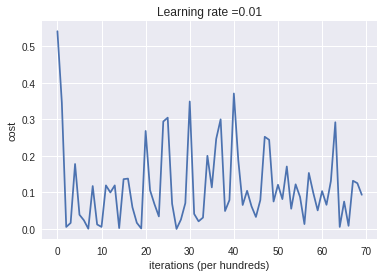

In [42]:
costs = np.squeeze(cst)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(0.01))
plt.show()

**Importing the Test dataset**

In [48]:
d8 = pd.read_csv("data/criminal_test.csv")
print(d8)

       IFATHER  NRCH17_2  IRHHSIZ2  IIHHSIZ2  IRKI17_2  IIKI17_2  IRHH65_2  \
0            4         0         3         1         1         1         1   
1            1         0         6         1         4         1         1   
2            4         0         1         1         1         1         1   
3            4         0         4         1         1         1         1   
4            4         0         2         1         1         1         1   
5            4         0         5         1         1         1         1   
6            4         0         3         1         1         1         2   
7            4         2         4         1         3         1         1   
8            4         2         6         1         4         1         1   
9            2         0         2         1         2         1         1   
10           4         3         5         1         4         1         1   
11           2         0         4         1         2         1

In [0]:
t8 = np.zeros((11430,70))
t8[:] = d8[:]

**Normalising The test data **

In [50]:
test_final = np.zeros((70,11430))
test_final = np.transpose(t8)
test_final = test_final - utr
test_final = test_final / norm
print(test_final)
print(str(test_final.shape))

[[ 4.65520561e-01 -1.69427277e+00  4.65520561e-01 ...  4.65520561e-01
   4.65520561e-01 -9.74341659e-01]
 [-6.03470629e-01 -6.03470629e-01 -6.03470629e-01 ...  1.94629767e+00
   1.94629767e+00 -6.03470629e-01]
 [-2.08341890e-01  1.26155503e+00 -1.18827317e+00 ...  2.81623749e-01
   2.81623749e-01  7.71589388e-01]
 ...
 [-9.94417216e-05 -1.30297148e-04 -7.91407063e-05 ... -5.59312233e-05
  -1.28505949e-04 -1.37063921e-04]
 [ 1.96108189e-04  1.70760853e-04  8.20451771e-05 ... -4.46915031e-05
  -8.27125072e-05 -2.09449187e-04]
 [ 2.01866538e+00  2.01866538e+00 -1.97705757e+00 ... -1.97705757e+00
  -1.97705757e+00  2.01866538e+00]]
(70, 11430)


**Predicting "Criminal" Values for the test data**

In [0]:
y8 = predict(test_final,para,layer)

In [52]:
print(y8)

[[0. 0. 0. ... 0. 0. 0.]]


**Downloading Predictions for submission**

In [0]:
from google.colab import files
with open('out20.csv', 'w') as f:
  np.savetxt('out20.csv',y8.T,fmt='%.1f',delimiter=',',newline='\n')

files.download('out20.csv')